# Audio analysis

In [1]:
!pip install torch==1.7.0

In [3]:
!pip install torchaudio

In [4]:
import torch
import pandas as pd
import IPython.display as ipd

%matplotlib inline
import matplotlib.pyplot as plt

In [5]:
torch.__version__

'1.7.0'

In [6]:
path = "/content/drive/My Drive/train/"
filename = "00a9347c36.wav" # for example

## Ipython.display

In [10]:
ipd.Audio(path + filename)

In [11]:
import numpy as np
sr = 22050 # sample rate
T = 2.0    # seconds
t = np.linspace(0, T, int(T*sr), endpoint=False) # time variable
x = 0.5*np.sin(2*np.pi*440*t)                # pure sine wave at 440 Hz

In [12]:
ipd.Audio(x, rate=sr) # load a NumPy array

## Librosa

In [13]:
import librosa
import librosa.display

In [15]:
x, sr = librosa.load(path + filename)

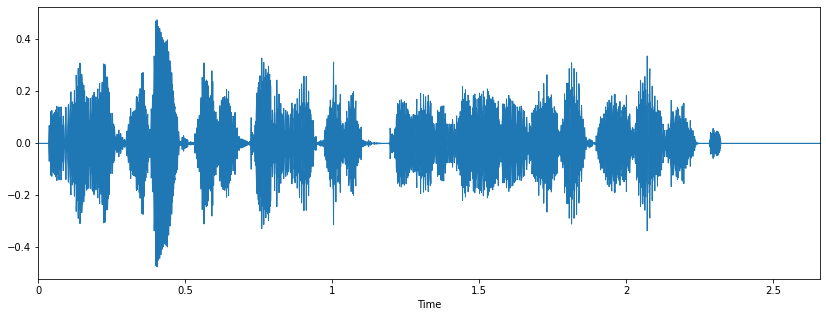

In [16]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

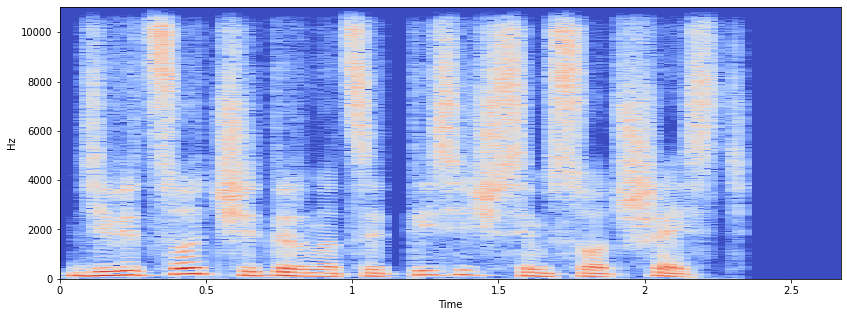

In [17]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')

## Torch

https://pytorch.org/docs/stable/index.html

Основной составляющая pytorch - это Tensor

In [18]:
#инициализируем тензор нормальным распределением
x = torch.randn(2, 2)
x

tensor([[ 2.0566, -0.6255],
        [-1.2091, -0.0267]])

In [19]:
y = torch.rand(2, 2)
y

tensor([[0.4415, 0.7983],
        [0.3954, 0.8872]])

In [20]:
x + y

tensor([[ 2.4981,  0.1728],
        [-0.8137,  0.8605]])

Torch хранит граф вычислений для тензоров. Сегодня нам это не нужно, но это очень важно!

## Torchaudio

SOURCE: https://colab.research.google.com/github/pytorch/tutorials/blob/gh-pages/_downloads/7303ce3181f4dbc9a50bc1ed5bb3218f/audio_preprocessing_tutorial.ipynb

tutorial link: https://pytorch.org/tutorials/beginner/audio_preprocessing_tutorial.html

In [21]:
import torchaudio
import os

/usr/local/lib/python3.6/dist-packages/torchaudio/backend/utils.py:54: UserWarning: "sox" backend is being deprecated. The default backend will be changed to "sox_io" backend in 0.8.0 and "sox" backend will be removed in 0.9.0. Please migrate to "sox_io" backend. Please refer to https://github.com/pytorch/audio/issues/903 for the detail.
  '"sox" backend is being deprecated. '


In [22]:
path = "/content/drive/My Drive/train/"
filename = "00a9347c36.wav"

In [23]:
def get_audio_meta(filename):
    """
    Compute audio stats for a single file
    :param filename: path to file relative to current working directory
    :return: dict
    """
    waveform, sample_rate = torchaudio.load(filename)
    size_bytes = os.path.getsize(filename)
    meta_info = dict(
        filename=os.path.basename(filename),
        channels=waveform.size()[0],
        frames=waveform.size()[1],
        sample_rate_hz=sample_rate,
        size_bytes=size_bytes,
        duration_s=waveform.size()[1] / sample_rate,
        bitrate=int(size_bytes * 8 / waveform.size()[1])
    )
    return meta_info

In [24]:
waveform, sample_rate = torchaudio.load(path + filename)

In [25]:
audio_meta = get_audio_meta(path + filename)

In [26]:
waveform

tensor([[0., 0., 0.,  ..., 0., 0., 0.]])

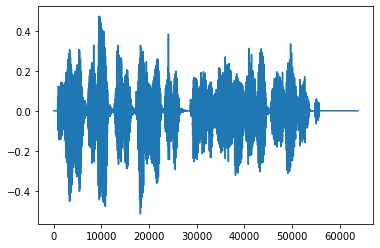

In [27]:
plt.figure()
plt.plot(waveform.t().numpy())

Transformations
---------------

``torchaudio`` supports a growing list of
`transformations <https://pytorch.org/audio/transforms.html>`_.

-  **Resample**: Resample waveform to a different sample rate.
-  **Spectrogram**: Create a spectrogram from a waveform.
-  **GriffinLim**: Compute waveform from a linear scale magnitude spectrogram using 
   the Griffin-Lim transformation.
-  **ComputeDeltas**: Compute delta coefficients of a tensor, usually a spectrogram.
-  **ComplexNorm**: Compute the norm of a complex tensor.
-  **MelScale**: This turns a normal STFT into a Mel-frequency STFT,
   using a conversion matrix.
-  **AmplitudeToDB**: This turns a spectrogram from the
   power/amplitude scale to the decibel scale.
-  **MFCC**: Create the Mel-frequency cepstrum coefficients from a
   waveform.
-  **MelSpectrogram**: Create MEL Spectrograms from a waveform using the
   STFT function in PyTorch.
-  **MuLawEncoding**: Encode waveform based on mu-law companding.
-  **MuLawDecoding**: Decode mu-law encoded waveform.
-  **TimeStretch**: Stretch a spectrogram in time without modifying pitch for a given rate.
-  **FrequencyMasking**: Apply masking to a spectrogram in the frequency domain.
-  **TimeMasking**: Apply masking to a spectrogram in the time domain.

Each transform supports batching: you can perform a transform on a single raw 
audio signal or spectrogram, or many of the same shape.

Since all transforms are ``nn.Modules`` or ``jit.ScriptModules``, they can be
used as part of a neural network at any point.


Shape of spectrogram: torch.Size([1, 201, 320])


/usr/local/lib/python3.6/dist-packages/torch/functional.py:516: UserWarning: stft will require the return_complex parameter be explicitly  specified in a future PyTorch release. Use return_complex=False  to preserve the current behavior or return_complex=True to return  a complex output. (Triggered internally at  /pytorch/aten/src/ATen/native/SpectralOps.cpp:653.)
  normalized, onesided, return_complex)
/usr/local/lib/python3.6/dist-packages/torch/functional.py:516: UserWarning: The function torch.rfft is deprecated and will be removed in a future PyTorch release. Use the new torch.fft module functions, instead, by importing torch.fft and calling torch.fft.fft or torch.fft.rfft. (Triggered internally at  /pytorch/aten/src/ATen/native/SpectralOps.cpp:590.)
  normalized, onesided, return_complex)


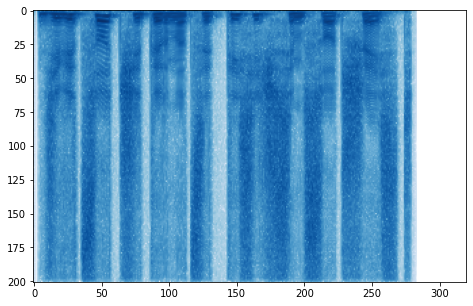

In [28]:
specgram = torchaudio.transforms.Spectrogram()(waveform)

print("Shape of spectrogram: {}".format(specgram.size()))

plt.figure(figsize=(14, 5))
plt.imshow(specgram.log2()[0,:,:].numpy(), cmap='Blues')

In [29]:
specgram = torchaudio.transforms.MelSpectrogram()(waveform)

print("Shape of spectrogram: {}".format(specgram.size()))

specgram # - это тоже тензор

Shape of spectrogram: torch.Size([1, 128, 320])


/usr/local/lib/python3.6/dist-packages/torchaudio/functional.py:318: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (128) may be set too high. Or, the value for `n_freqs` (201) may be set too low.
  "At least one mel filterbank has all zero values. "


tensor([[[0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
          0.0000e+00, 0.0000e+00],
         [6.7585e-07, 1.5781e-06, 6.8196e-10,  ..., 0.0000e+00,
          0.0000e+00, 0.0000e+00],
         [3.6390e-06, 8.4972e-06, 3.6719e-09,  ..., 0.0000e+00,
          0.0000e+00, 0.0000e+00],
         ...,
         [1.7412e-09, 9.9717e-10, 1.4176e-11,  ..., 0.0000e+00,
          0.0000e+00, 0.0000e+00],
         [4.1373e-09, 8.4773e-10, 1.4456e-11,  ..., 0.0000e+00,
          0.0000e+00, 0.0000e+00],
         [3.9134e-09, 8.9070e-10, 1.4264e-11,  ..., 0.0000e+00,
          0.0000e+00, 0.0000e+00]]])

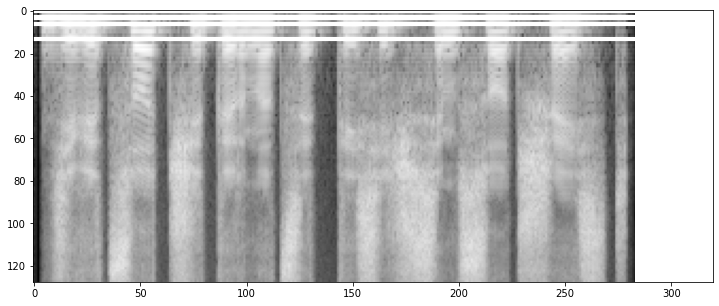

In [30]:
plt.figure(figsize=(14, 5))
p = plt.imshow(specgram.log2()[0,:,:].detach().numpy(), cmap='gray')

In [31]:
# Let's check if the tensor is in the interval [-1,1]
print("Min of waveform: {}\nMax of waveform: {}\nMean of waveform: {}".format(waveform.min(), waveform.max(), waveform.mean()))

Min of waveform: -0.51593017578125
Max of waveform: 0.47314453125
Mean of waveform: 0.00019978274940513074


нормализация не нужна. А зачем вообще может быть нужна нормализация?



Now let's experiment with a few of the other functionals and visualize their output. Taking our 
spectogram, we can compute it's deltas:

Shape of computed deltas: torch.Size([1, 128, 320])


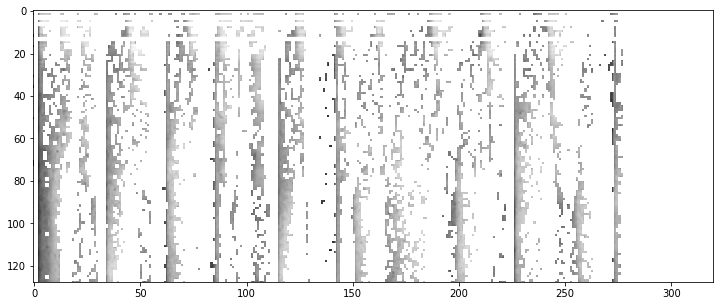

In [32]:
computed = torchaudio.functional.compute_deltas(specgram.contiguous(), win_length=3)
print("Shape of computed deltas: {}".format(computed.shape))

plt.figure(figsize=(14,5))
plt.imshow(computed.log2()[0,:,:].detach().numpy(), cmap='gray')